In [81]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import numpy as np
import skimage.io as io

In [111]:
import dataloader as data
# from dataloader import load_nosepoint, reag_img_part1

In [106]:
# get_gender(30)

'f'

In [107]:
# data.load_nosepoint(person_idx=30, viewpt_idx=1)

array([0.5542087 , 0.62599987], dtype=float32)

In [112]:
# data.read_img_part1(1, 1)

array([[0.07122196, 0.11828078, 0.10822039, ..., 0.11554275, 0.09761647,
        0.11722431],
       [0.0930698 , 0.10259451, 0.08412549, ..., 0.10823529, 0.10039216,
        0.08862745],
       [0.10483451, 0.09699137, 0.08020392, ..., 0.08777922, 0.09562235,
        0.10738706],
       ...,
       [0.10120275, 0.0698302 , 0.06198706, ..., 0.12737569, 0.1509051 ,
        0.11953255],
       [0.10316   , 0.08355216, 0.09139529, ..., 0.14698353, 0.1509051 ,
        0.12737569],
       [0.06029059, 0.0908298 , 0.08690824, ..., 0.13353725, 0.13662549,
        0.14446863]])

In [116]:
# Use all 6 images of the first 32 persons (index 1-32) as the training set
# (total 32 x 6 = 192 images)
training_set = {}
for person_index in range(1,32+1):
    for viewpt_index in range(1,6+1):
        nose_point = data.load_nosepoint(person_index, viewpt_index)
        img = data.read_img_part1(person_index, viewpt_index)
        key = (person_index, viewpt_index)
        value = (img, nose_point)
        training_set[key] = value

assert len(training_set.items()) == 192, len(training_set.items())

In [122]:
# Use images of the remaining 8 persons (index 33-40) as the validation set
# (total 8 * 6 = 48 images)
validation_set = {}
for person_index in range(33,40+1):
    for viewpt_index in range(1,6+1):
        nose_point = data.load_nosepoint(person_index, viewpt_index)
        img = data.read_img_part1(person_index, viewpt_index)
        key = (person_index - 33 + 1, viewpt_index)
        value = (img, nose_point)
        validation_set[key] = value

assert len(validation_set.items()) == 48, len(validation_set.items())

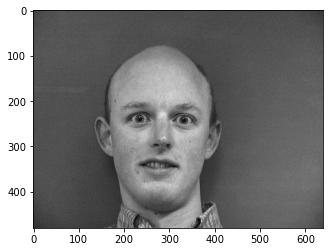

In [128]:
import matplotlib.pyplot as plt
plt.imshow(validation_set[(1, 1)][0], cmap='gray')